In [100]:
import numpy as np # linear algebra

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))
import cv2
import matplotlib.pyplot as plt

In [101]:
train_path="C:\\Users\\vidya\\pythonfolder\\Scripts\\shailendra\\Deep learning\\Image classification\\catsvsdogs"

#creating training data path
path=os.path.join(train_path,"train_data")
print(path)
training_data=[]
img_size=80

for  i in os.listdir("train_data"):
    path=os.path.join("train_data",i) #gives the image data for imread
    name =i.split(".")[0]
    if name=="cat":
        label=0
    else:
        label=1
    #reading images and resize using imread and resize and gray scale is forblack n white images
    print(name)
    images=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(img_size,img_size)) #resize the image
    training_data.append([np.array(images),np.array(label)])
    np.random.shuffle(training_data)
    np.save("cat_dog_traing_data.npy",training_data)

C:\Users\vidya\pythonfolder\Scripts\shailendra\Deep learning\Image classification\catsvsdogs\train_data
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat


In [102]:
#making training data  asnumpy array   
training_data=np.array(training_data)
training_data.shape  

(1003, 2)

In [163]:
#dividing the data into images and label for the neural network
X= np.array([i[0] for i in training_data])
y=np.array([i[1] for i in training_data])
#scale the data
X=X/255
X=X.reshape(-1,80,80,1)
X.shape,y.shape

((1003, 80, 80, 1), (1003,))

In [143]:
import tensorflow as tf
from keras.models import Sequential 
from keras import layers 
from keras.layers import Conv2D,MaxPool2D,Dense,Softmax,Flatten


from keras.layers import Dropout
from keras.optimizers import Adam
opt=Adam(lr=.001)
model=Sequential()
model.add(Dense(30,activation="relu",input_shape=(80,80,1)))
model.add(Conv2D(30,(3,3)))#image size with color/bw
model.add(MaxPool2D(2,2))

model.add(Conv2D(30,(3,3)))#image size with color/bw
model.add(MaxPool2D(2,2))


model.add(Flatten())
model.add(Dense(30,activation="relu"))
#model.add(Dropout(0.25))

model.add(Dense(30,activation="relu"))
#model.add(Dropout(0.25))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 80, 80, 30)        60        
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 78, 78, 30)        8130      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 39, 39, 30)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 37, 37, 30)        8130      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 18, 18, 30)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 9720)              0         
_________________________________________________________________
dense_86 (Dense)             (None, 30)                291630    
__________

In [144]:
history=model.fit(X,y,epochs=20,batch_size=30)

Epoch 1/20
1003/1003 [==============================] - 19s 18ms/step - loss: 0.7079 - acc: 0.5045
Epoch 2/20
1003/1003 [==============================] - 17s 16ms/step - loss: 0.6992 - acc: 0.5165
Epoch 3/20
1003/1003 [==============================] - 16s 16ms/step - loss: 0.6955 - acc: 0.5075
Epoch 4/20
1003/1003 [==============================] - 16s 16ms/step - loss: 0.6769 - acc: 0.5743
Epoch 5/20
1003/1003 [==============================] - 16s 16ms/step - loss: 0.6640 - acc: 0.5982
Epoch 6/20
1003/1003 [==============================] - 16s 16ms/step - loss: 0.6450 - acc: 0.6261
Epoch 7/20
1003/1003 [==============================] - 16s 16ms/step - loss: 0.6157 - acc: 0.6730
Epoch 8/20
1003/1003 [==============================] - 17s 16ms/step - loss: 0.5337 - acc: 0.7358
Epoch 9/20
1003/1003 [==============================] - 16s 16ms/step - loss: 0.4460 - acc: 0.8056
Epoch 10/20
1003/1003 [==============================] - 16s 16ms/step - loss: 0.3210 - acc: 0.8654
Epoch 11/

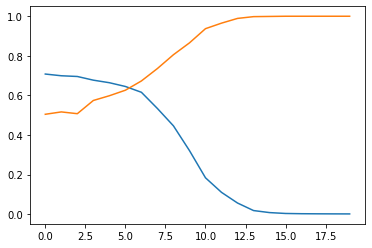

In [145]:
plt.plot(history.history["loss"])
plt.plot(history.history["acc"])

In [202]:
#creating testing data
test_path="C:\\Users\\vidya\\pythonfolder\\Scripts\\shailendra\\Deep learning\\Image classification\\catsvsdogs\\test_data"
testing_data =[]
for imgs in os.listdir("test_data"):
        #print(imgs)
        path=os.path.join("test_data",imgs)# returns the image to be used by cv2
        #for label as cat or dog
        name=imgs.split(".")[0]
        #print(name)
        if name=="cat":
            label=0
        else:
            label=1
            
        
        images=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(img_size,img_size))
        testing_data.append([np.array(images),np.array(label)])
        np.random.shuffle(testing_data)
        np.save("cat_dog_testing_data.npy",testing_data)
        
        



cat.243.jpg
cat
cat.244.jpg
cat
cat.245.jpg
cat
cat.246.jpg
cat
cat.247.jpg
cat
cat.248.jpg
cat
cat.249.jpg
cat
cat.250.jpg
cat
cat.251.jpg
cat
cat.252.jpg
cat
cat.253.jpg
cat
cat.254.jpg
cat
cat.255.jpg
cat
cat.256.jpg
cat
cat.257.jpg
cat
cat.258.jpg
cat
cat.259.jpg
cat
cat.260.jpg
cat
cat.261.jpg
cat
cat.262.jpg
cat
cat.263.jpg
cat
cat.264.jpg
cat
cat.265.jpg
cat
cat.266.jpg
cat
cat.267.jpg
cat
cat.268.jpg
cat
cat.269.jpg
cat
cat.270.jpg
cat
cat.271.jpg
cat
cat.272.jpg
cat
cat.273.jpg
cat
cat.274.jpg
cat
cat.275.jpg
cat
cat.276.jpg
cat
cat.277.jpg
cat
cat.278.jpg
cat
cat.279.jpg
cat
cat.280.jpg
cat
cat.281.jpg
cat
cat.282.jpg
cat
cat.283.jpg
cat
cat.284.jpg
cat
cat.285.jpg
cat
cat.286.jpg
cat
cat.287.jpg
cat
cat.288.jpg
cat
cat.289.jpg
cat
cat.290.jpg
cat
cat.291.jpg
cat
cat.292.jpg
cat
cat.293.jpg
cat
cat.294.jpg
cat
cat.295.jpg
cat
cat.296.jpg
cat
cat.297.jpg
cat
cat.298.jpg
cat
cat.299.jpg
cat
cat.300.jpg
cat
cat.301.jpg
cat
cat.302.jpg
cat
cat.303.jpg
cat
cat.304.jpg
cat
cat.305.

In [203]:
#dividing the data into images and label for the neural network
X_test= np.array([i[0] for i in testing_data]).reshape(-1,80,80,1)
y_test=np.array([i[1] for i in testing_data])
X_test=X_test/255


In [204]:
X_test.shape

(180, 80, 80, 1)

In [205]:
#prediction
y_pred=model.predict(X_test)

In [206]:

#
#saving the model

model.save("Imageclassfication.h5py")


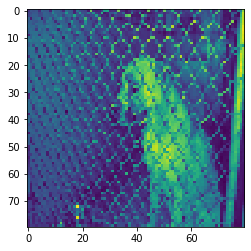

In [208]:
#plotting image
X_image=X_test[0].reshape(80,80)
X_image.shape
plt.imshow(X_image)

In [209]:
y_test[0]

1

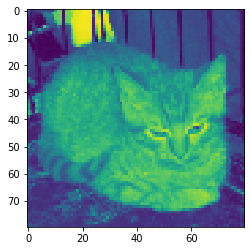

In [210]:
X_image=X_test[99].reshape(80,80)
X_image.shape
plt.imshow(X_image)

In [211]:
y_test[99]

0